# Proyecto Mineria de Datos (Arboles de Decision)

---
Alumno: Angel Alonso Galarza Chavez <br>
Materia: Mineria de Datos <br>
Docente: Dra. Xiaoou Li

---

## Importando las bibliotecas

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from chefboost import Chefboost as chef

from IPython.display import display, HTML

## Analisis Exploratorio de Datos

### Cargando el Dataset

In [2]:
# Lista con los nombres de las caracteristicas
iris_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
iris_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [3]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_iris = pd.read_csv('../Datasets/iris/iris.data', names=iris_names, header=None)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Descripcion del conjunto de datos
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Histograma de los atributos

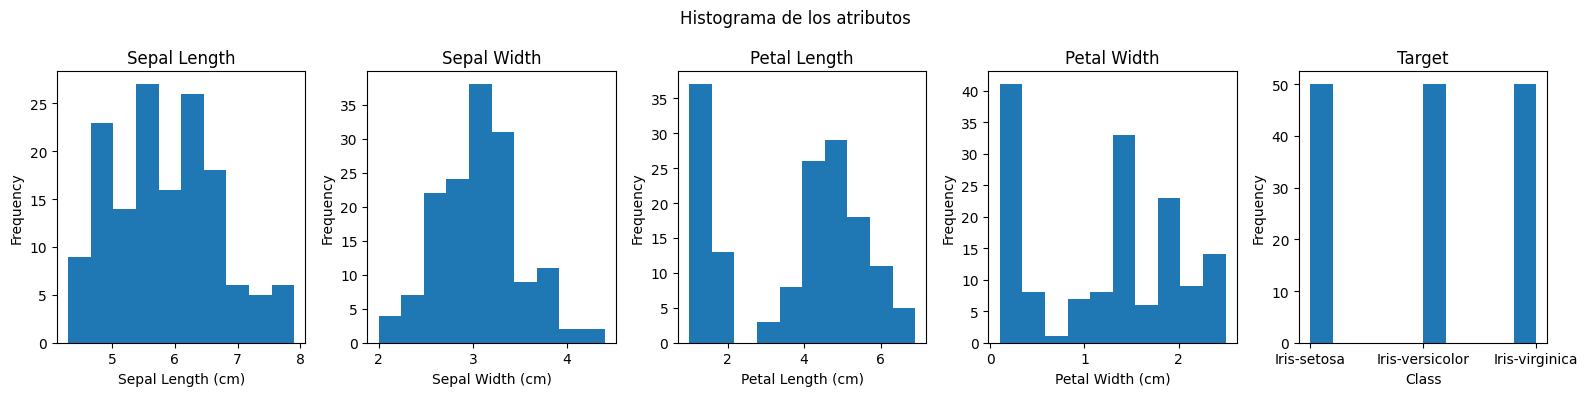

In [6]:
#plt.hist(df_iris['petal_width'])
fig, axs = plt.subplots(1, 5)
fig.set_figheight(4)
fig.set_figwidth(16)


fig.suptitle('Histograma de los atributos')
axs[0].hist(df_iris['sepal_length'])
axs[0].set_xlabel('Sepal Length (cm)')  # Etiqueta del eje x
axs[0].set_ylabel('Frequency')
axs[0].set_title('Sepal Length')

axs[1].hist(df_iris['sepal_width'])
axs[1].set_xlabel('Sepal Width (cm)')  # Etiqueta del eje x
axs[1].set_ylabel('Frequency')  
axs[1].set_title('Sepal Width')

axs[2].hist(df_iris['petal_length'])
axs[2].set_xlabel('Petal Length (cm)')  # Etiqueta del eje x
axs[2].set_ylabel('Frequency')  
axs[2].set_title('Petal Length')

axs[3].hist(df_iris['petal_width'])
axs[3].set_xlabel('Petal Width (cm)')  # Etiqueta del eje x
axs[3].set_ylabel('Frequency')  
axs[3].set_title('Petal Width')

axs[4].hist(df_iris['target'])
axs[4].set_xlabel('Class')  # Etiqueta del eje x
axs[4].set_ylabel('Frequency')  
axs[4].set_title('Target')

fig.tight_layout()
plt.show()

<Axes: ylabel='Range (cm)'>

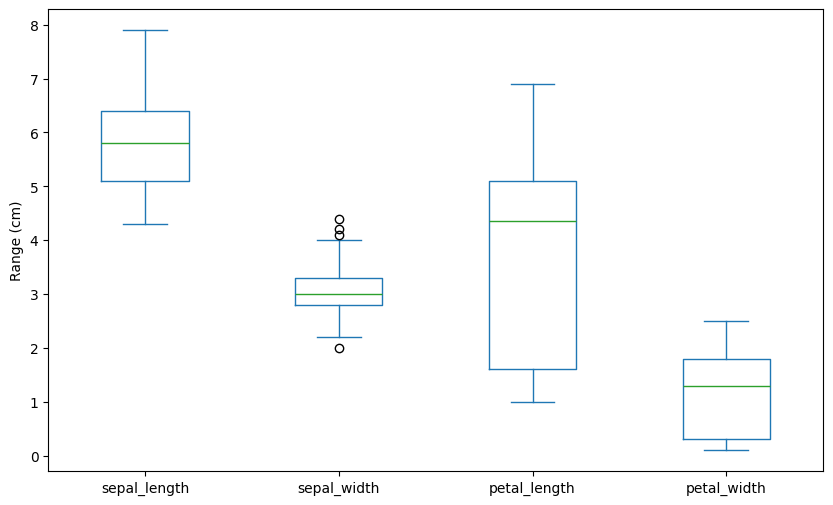

In [7]:
df_iris.plot(kind='box', figsize=(10,6), ylabel='Range (cm)')

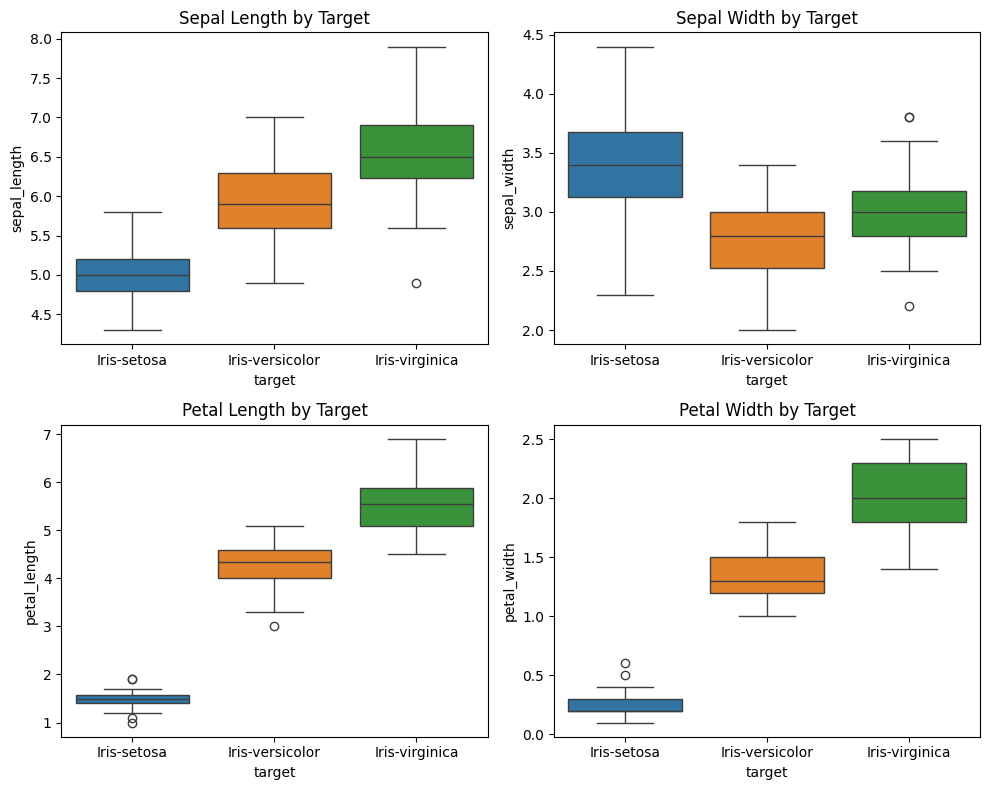

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


ax = sns.boxplot(data = df_iris, x = 'target', y = 'sepal_length', hue='target', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length by Target')

ax = sns.boxplot(data = df_iris, x = 'target', y = 'sepal_width', hue='target', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Width by Target')


ax = sns.boxplot(data = df_iris, x = 'target', y = 'petal_length', hue='target', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length by Target')

ax = sns.boxplot(data = df_iris, x = 'target', y = 'petal_width', hue='target', ax=axs[1, 1])
axs[1, 1].set_title('Petal Width by Target')


# Ajustar el layout
plt.tight_layout()
plt.show()

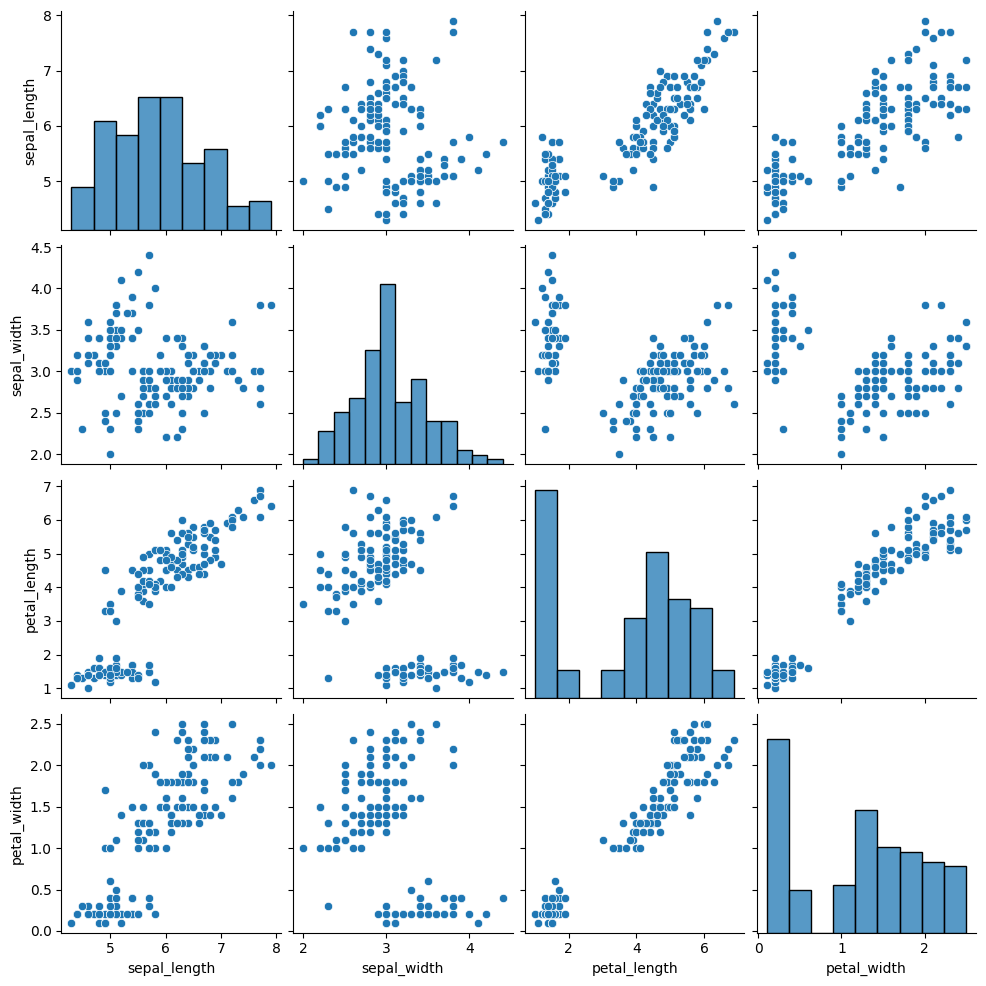

In [9]:
# Correlacion
sns.pairplot(df_iris)

## Preprocesamiento de Datos

### Limpieza de los datos

Explicar porque no se realizara una limpieza de los datos

### Transformacion de los datos

In [10]:
# Separacion de los features con el target


In [11]:
#Transformando la columna Target a valores numericos {iris-setosa = 0, iris-versicolor = 1, iris-virginica = 2}
#Con LabelEncoder
#Encode target labels with value between 0 and n_classes-1.

# Transformacion de la columan target a formato numerico (justificar)
le = LabelEncoder()

df_iris['target'].unique()
df_iris['target'] = le.fit_transform(df_iris['target'])
df_iris['target'].unique()

array([0, 1, 2])

In [12]:
x_data = df_iris.iloc[:, :4]
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y_data = df_iris.iloc[:, -1]
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [23]:
# Division del dataset (entrenamiento 70%, prueba 30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3 ,random_state=31)
print('Dimensiones de datos de entrenamienot')
print(str(x_train.shape) + ' ' + str(y_train.shape))
print('Dimensiones de datos de prueba')
print(str(x_test.shape) + ' ' + str(y_test.shape))

Dimensiones de datos de entrenamienot
(105, 4) (105,)
Dimensiones de datos de prueba
(45, 4) (45,)


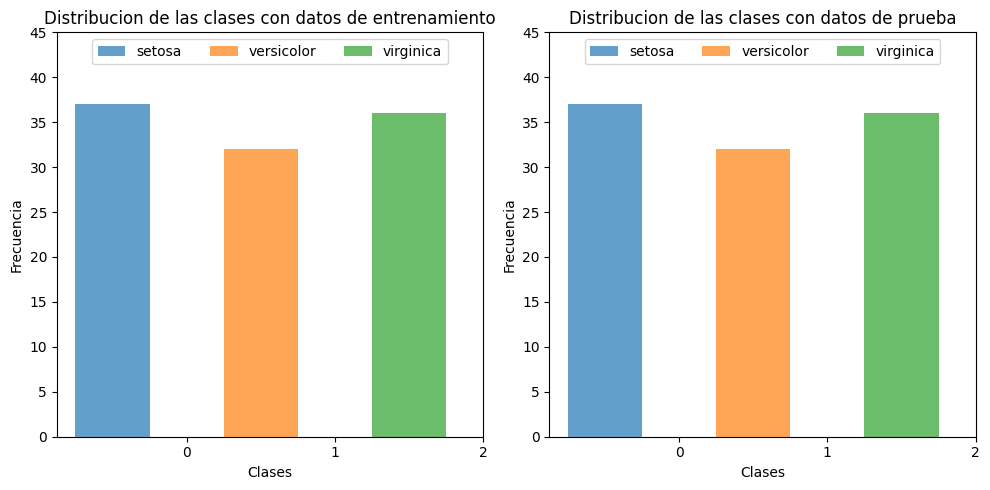

In [61]:
# observando la distribucion de target con los datos de entrenamiento y prueba
colors = ['tab:blue', 'tab:orange', 'tab:green']  # Lista de colores para cada barra
plt.figure(figsize=(10, 5))
labels = ['setosa', 'versicolor', 'virginica']

plt.subplot(1, 2, 1)
#plt.hist(x = y_train)
counts, bins = np.histogram(y_train, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2])
plt.yticks(np.arange(0, (max(counts) + 1) + 10, 5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(1, 2, 2)
#plt.hist(x = y_test)
counts, bins = np.histogram(y_train, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de prueba')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2])
plt.yticks(np.arange(0, (max(counts) + 1) + 10, 5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.tight_layout()
plt.show()

## Construccion del Modelo

In [62]:
## Construccion del modelo con scikit-learn
clf = DecisionTreeClassifier(random_state = 31)

In [63]:
### entrenamiento del modelo sin validacion cruzada
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=31)

In [64]:
y_predict = clf.predict(x_test)

## Evaluacion del Modelo

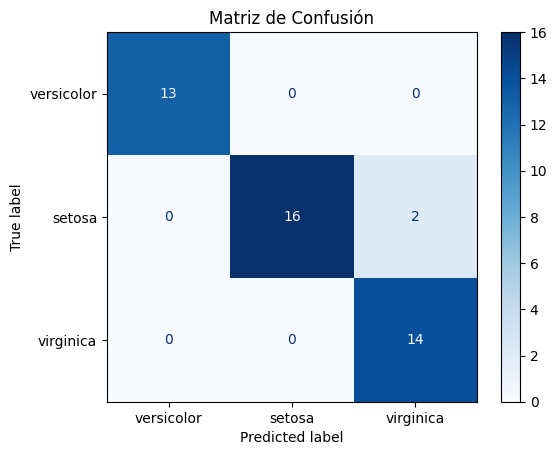

In [66]:
### Metricas a utlizar (matriz de confusion)
target_names = ['versicolor', 'setosa', 'virginica']

c_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Visualizacion del arbol

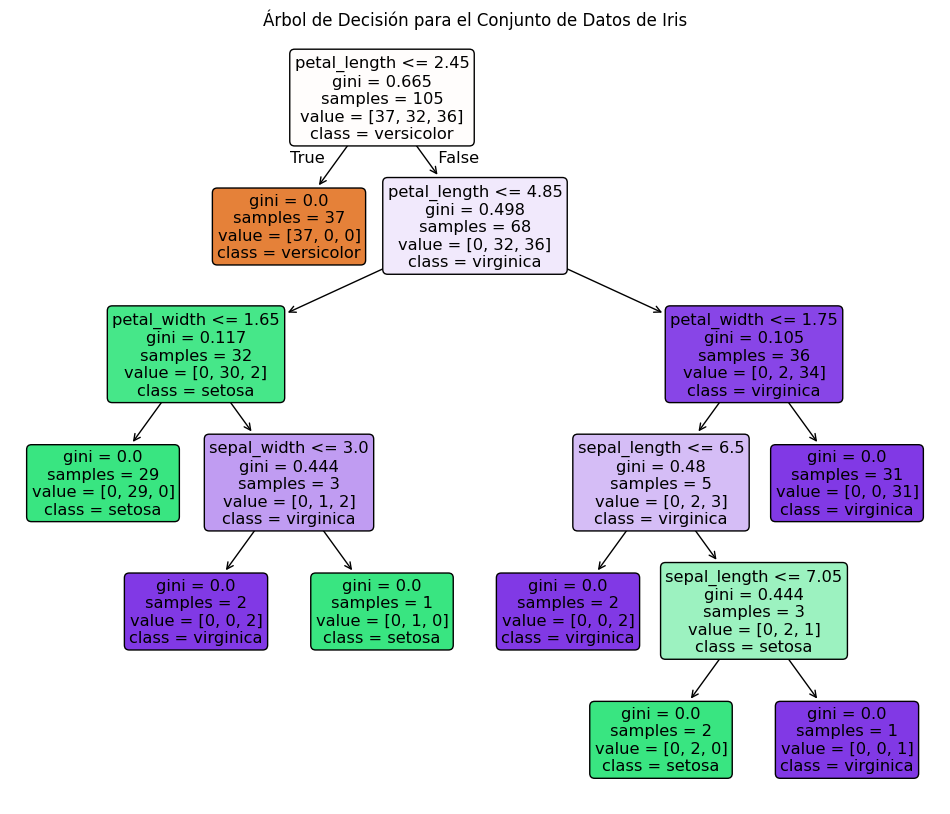

In [71]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(clf, feature_names = iris_names, class_names = target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Iris")
plt.show()

## Conclusiones